In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
toyoto=pd.read_csv("/content/ToyotaCorolla - MLR.csv")
toyoto.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# Data Preprocessing

  1.Encoding categorical variables (FuelType, Automatic).                       
 2.Handling missing values (if any).         
3.Feature selection and scaling: Normalization or standardization based on the nature of the features.

In [3]:
toyoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


<Axes: >

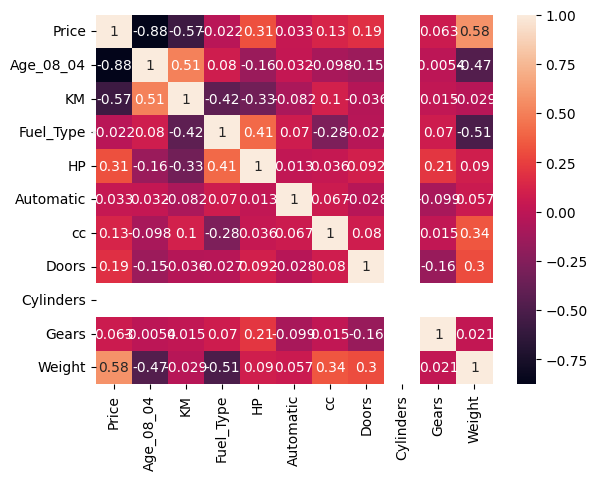

In [4]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'FuelType' column
toyoto['Fuel_Type'] = le.fit_transform(toyoto['Fuel_Type'])

# Calculate the correlation matrix and generate the heatmap
sns.heatmap(toyoto.corr(), annot=True)

In [5]:
toyoto=toyoto.rename({'Age_08_04':'Age'},axis=1)
toyoto

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [6]:
toyoto.isna().sum()

,0
Price,0
Age,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [7]:
toyoto.select_dtypes(include=['number']).corr()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


**Data** **Visualization**

<Axes: xlabel='Doors'>

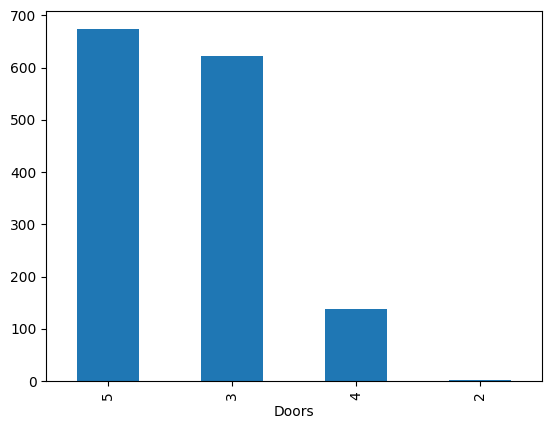

In [8]:
toyoto['Doors'].value_counts().plot(kind='bar')

<Axes: xlabel='Cylinders'>

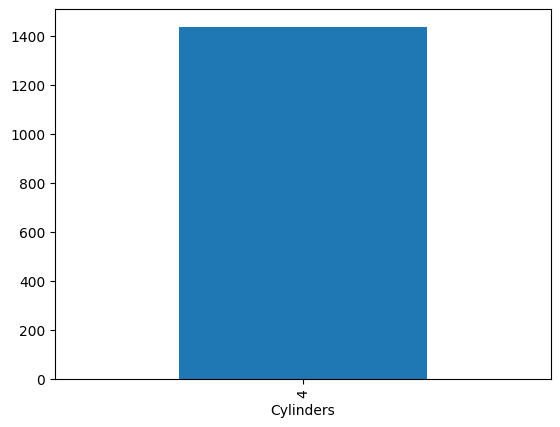

In [9]:
toyoto['Cylinders'].value_counts().plot(kind='bar')

<Axes: xlabel='Gears'>

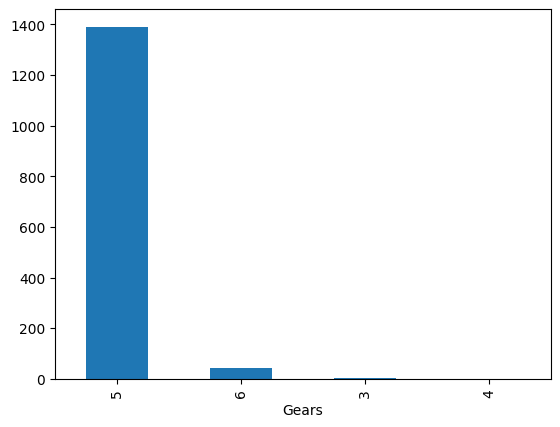

In [10]:
toyoto['Gears'].value_counts().plot(kind='bar')

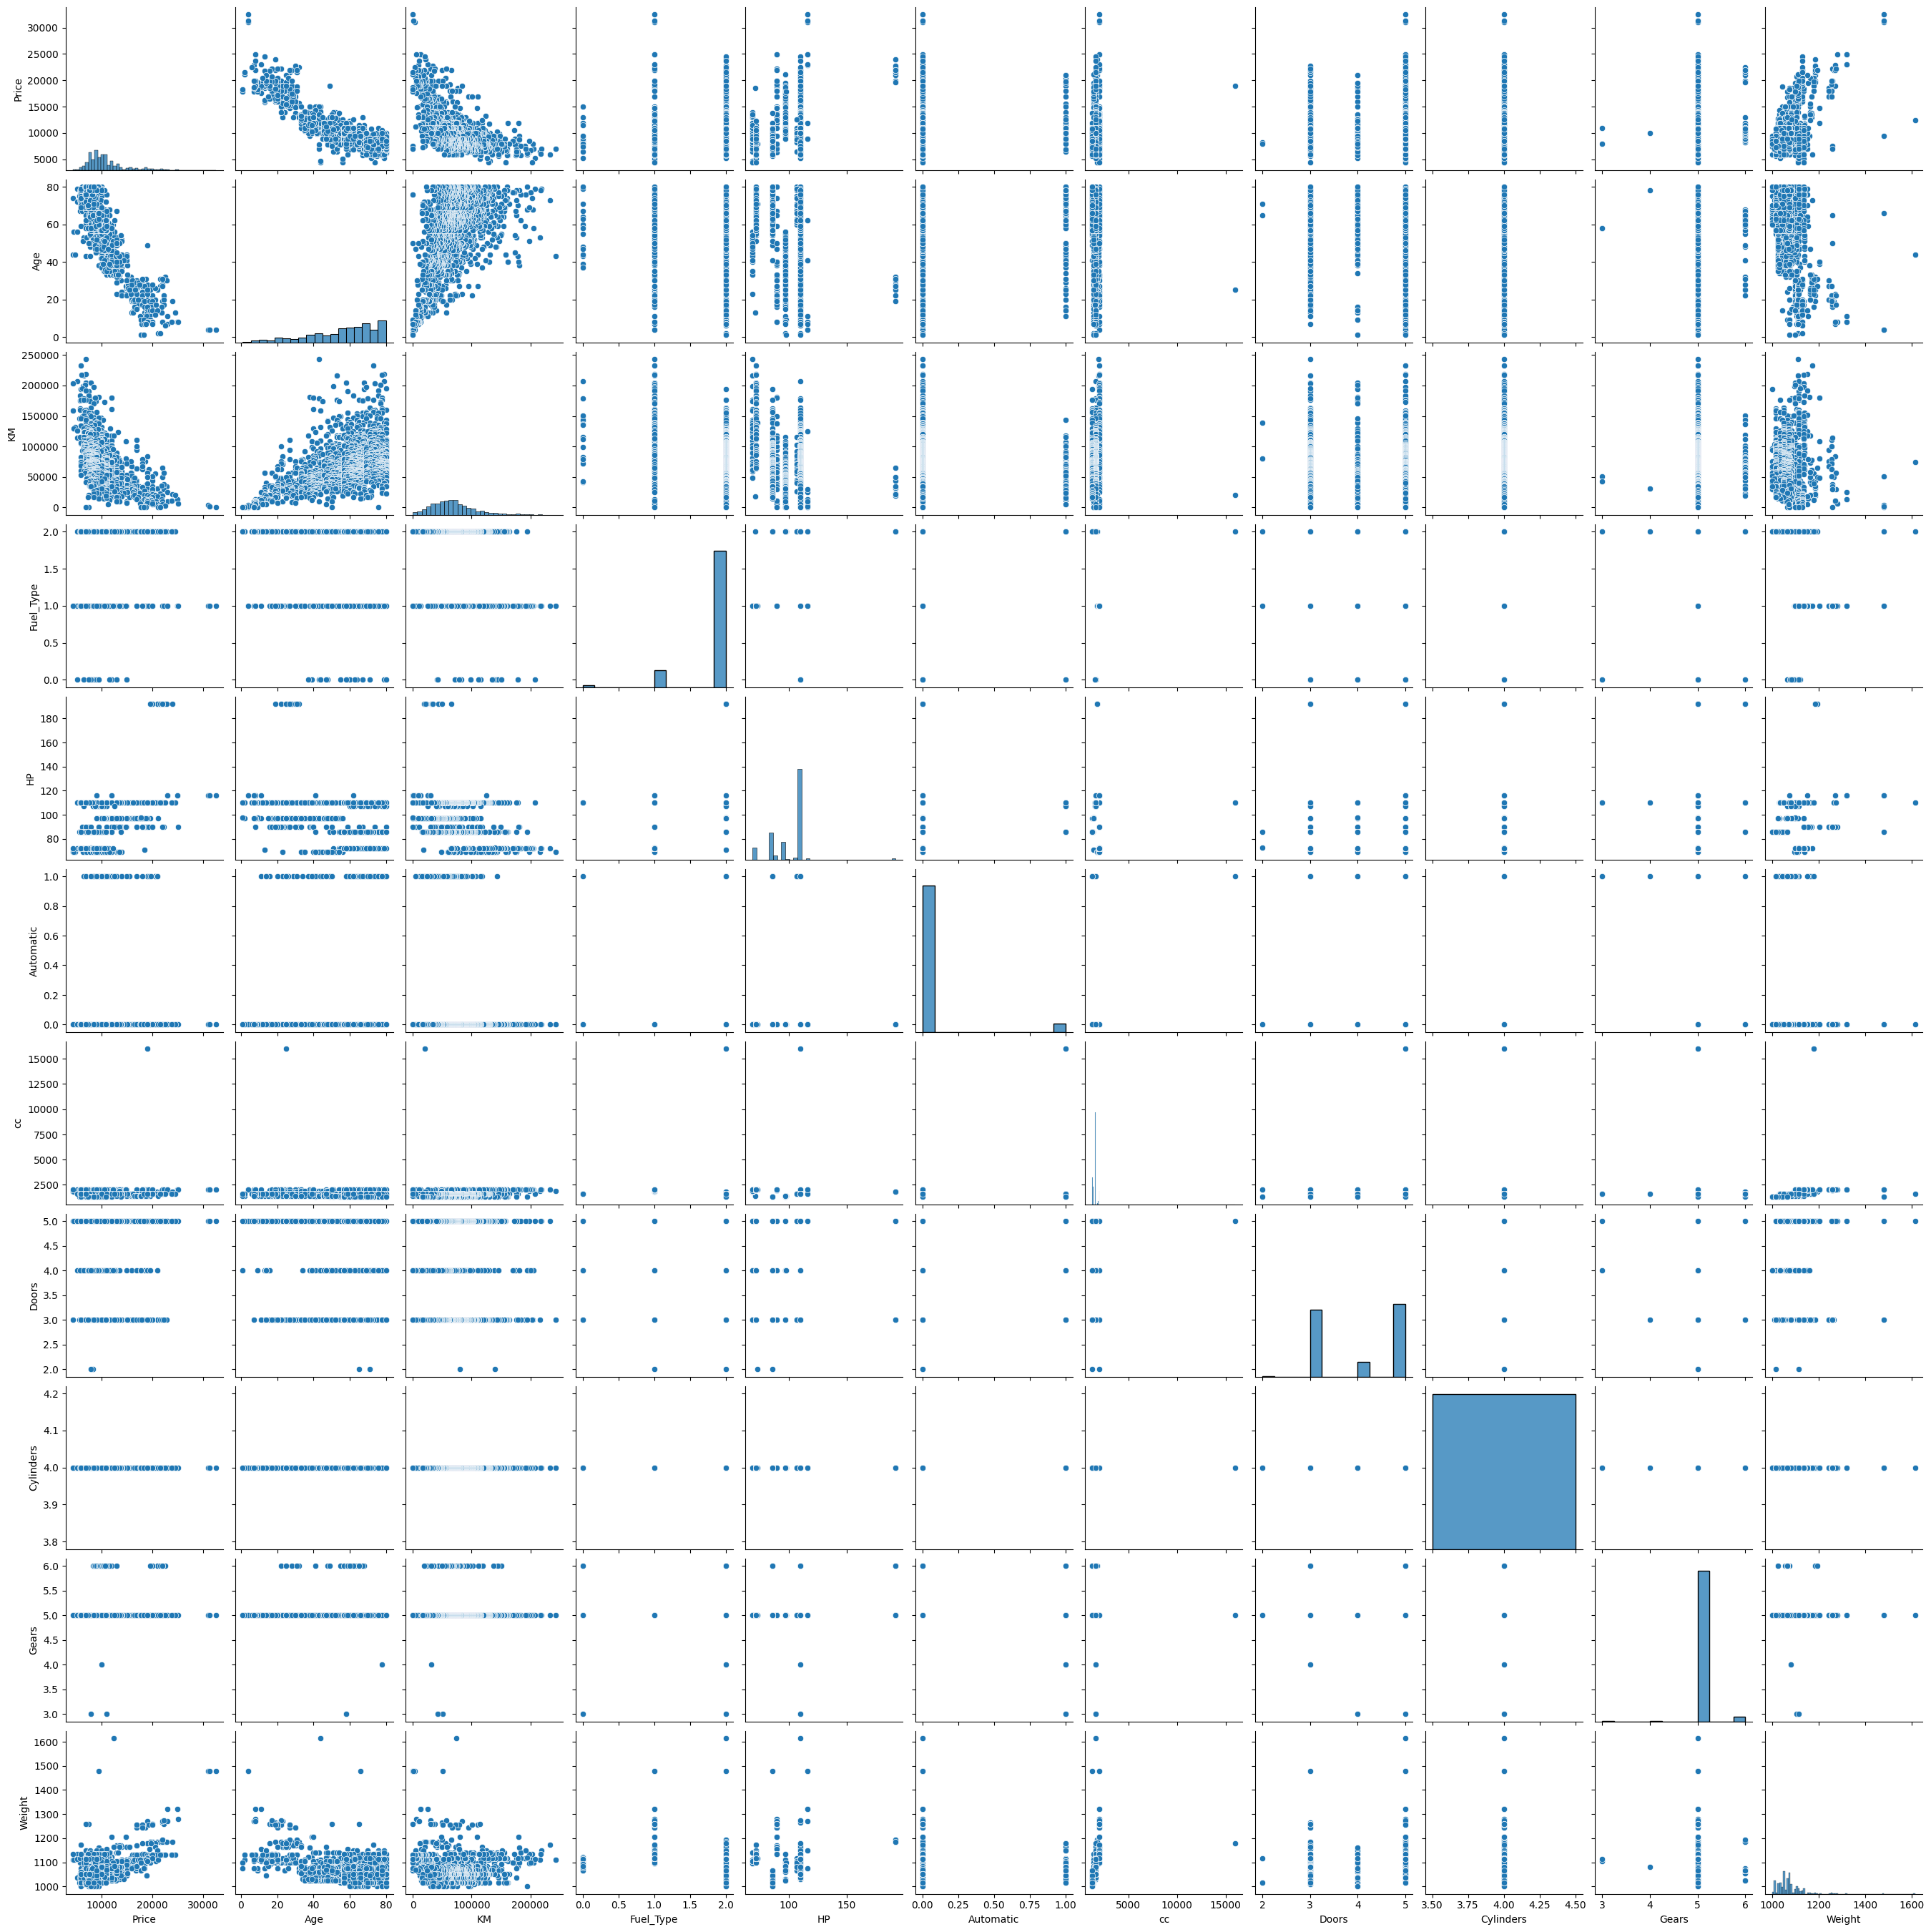

In [11]:
sns.pairplot(toyoto)

<Axes: >

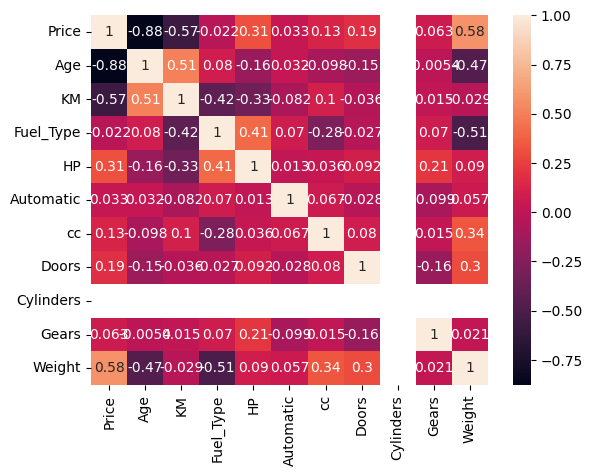

In [12]:
sns.heatmap(toyoto.corr(),annot=True)

# MULTIPLE LINEAR REGRESSION

Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between one dependent (target) variable and multiple independent (predictor) variables

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=toyoto.drop(['Price'],axis=1)
y=toyoto[['Price']]

In [15]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [16]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1148, 10) (288, 10) (1148, 1) (288, 1)


In [17]:
from sklearn import linear_model
from sklearn.metrics import classification_report

In [18]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [19]:
#Predicting on test data
preds = regr.predict(x_test) # predicting on test data set

In [20]:
preds

array([[ 7408.39858279],
       [11083.89302238],
       [ 7694.61781951],
       [12834.17634599],
       [13126.17087938],
       [10260.19589305],
       [10661.7728385 ],
       [ 7806.39340991],
       [ 8446.61885199],
       [ 5856.24988874],
       [ 8014.56203234],
       [13389.52622236],
       [12342.83718268],
       [10766.54244696],
       [ 6700.55485388],
       [11029.56454609],
       [ 8205.20058145],
       [15986.62326075],
       [ 8525.91457966],
       [ 9500.50416526],
       [16455.87115672],
       [ 7354.25926327],
       [ 7788.47847323],
       [11407.81496082],
       [10539.53796579],
       [ 6546.50993925],
       [ 8179.0891352 ],
       [10798.4329333 ],
       [ 9896.42605767],
       [11465.17566365],
       [ 8179.29878219],
       [ 9817.94300791],
       [12967.54996999],
       [ 8014.03584274],
       [10869.07385139],
       [ 9011.87091123],
       [ 8255.08481206],
       [11851.39765857],
       [ 7993.77466541],
       [ 9837.94186677],


In [21]:
# Putting together the coefficient and their corrsponding variable names
regr_coefficient = pd.DataFrame()
regr_coefficient["Columns"] = x_train.columns
regr_coefficient['Coefficient Estimate'] = pd.Series(regr.coef_.flatten())
print(regr_coefficient)


     Columns  Coefficient Estimate
0        Age         -1.237829e+02
1         KM         -1.753825e-02
2  Fuel_Type          5.777178e+02
3         HP          2.366908e+01
4  Automatic          3.020992e+02
5         cc         -5.693481e-02
6      Doors         -2.991783e+01
7  Cylinders          5.684342e-13
8      Gears          6.220168e+02
9     Weight          2.077316e+01


# SVM Model

Support Vector Machines (SVMs) are powerful supervised learning models used for both classification and regression. When applied to regression tasks, the model is known as Support Vector Regression (SVR). The goal of SVR is to find a line (or hyperplane in higher dimensions) that best fits the data within a certain margin of tolerance.

In [22]:
from sklearn import svm
from sklearn.svm import SVR

In [23]:
svm=SVR()
svm.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [24]:
#Predicting on test data
preds1 = svm.predict(x_test) # predicting on test data set

In [25]:
preds1

array([ 9714.37140854,  9962.2181717 ,  9813.26243295,  9976.31482606,
        9967.54131391,  9946.17286227,  9838.32845922,  9832.08159857,
        9924.04975508,  9769.11701749,  9798.50622095,  9894.84968081,
        9961.02056897,  9746.08431663,  9727.57251556,  9817.03162951,
        9890.1834874 ,  9994.37010657,  9777.92238922,  9935.86881457,
        9999.71818327,  9714.93601561,  9797.97906859,  9984.07554793,
        9886.27956376,  9976.30846867,  9905.068186  ,  9901.28937844,
        9948.8558371 ,  9980.7012808 ,  9837.82651994,  9942.43455751,
        9866.61546802,  9802.49826805,  9983.27568159,  9833.80678868,
        9715.6009865 ,  9935.67731053,  9719.48155596,  9788.05149936,
        9713.83401977,  9978.10919911, 10004.71575394,  9710.7911847 ,
        9990.40098795,  9993.11140206,  9899.29321925,  9746.54716383,
        9769.57853436,  9974.12184577,  9775.57250714,  9719.83695494,
        9797.98714401,  9874.94371329,  9759.66881751,  9991.06896067,
      

# Decision Tree Model

A Decision Tree is a non-linear predictive model that works by splitting the data into different subsets based on the most significant attributes, forming a tree structure. Decision Trees can be used for both classification and regression problems, depending on whether the target variable is categorical or continuous.

In [26]:
from sklearn.tree import  DecisionTreeRegressor

In [27]:
decision = DecisionTreeRegressor()
decision.fit(x_train,y_train)

DecisionTreeRegressor()

In [28]:
#Predicting on test data
preds2 = decision.predict(x_test) # predicting on test data set

In [29]:
preds2

array([ 8950., 11500.,  7950., 11500., 13995., 10900.,  9950.,  7500.,
        9250.,  7250.,  6750., 11690., 11950.,  9950.,  7950.,  9500.,
        7950., 17950.,  7900.,  8750., 18500.,  7250.,  8950.,  9695.,
        8900.,  8500.,  8750., 10495.,  9950., 12500.,  7950.,  8900.,
       12900.,  7450.,  9980.,  9950.,  7950.,  9650.,  7950., 10450.,
        6900., 13995., 16450.,  7950., 15950.,  7500., 11900.,  8700.,
        7500., 11500.,  8500.,  9450., 21950.,  8200., 11950., 13500.,
        7950.,  8750.,  7950., 10495.,  6950.,  9950., 10495., 10250.,
        6490.,  8495.,  8750.,  7950.,  7950.,  8950.,  8750.,  8950.,
       10950.,  6750., 18950., 10950.,  7600.,  7750.,  6900., 12695.,
        8500.,  9250.,  6950.,  9650.,  6950.,  9950., 10850., 13875.,
        8950.,  8950., 10500.,  9950., 11950., 12950., 19950.,  9980.,
       10500., 11930., 12750.,  9750., 31275.,  9250.,  8950.,  6750.,
        6650., 11950.,  9450.,  9990., 17950.,  7250.,  9500., 12950.,
      

## KNN Model

 it is a k-Nearest Neighbors (kNN) model to predict the price of Toyota Corolla, . kNN is a non-parametric method used for classification and regression tasks. It makes predictions based on the closest training samples in the feature space.

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [32]:
#Predicting on test data
preds3 = knn.predict(x_test) # predicting on test data set

In [33]:
preds3

array([[ 8140. ],
       [12659. ],
       [ 9588. ],
       [15780. ],
       [12620. ],
       [10208. ],
       [ 9870. ],
       [10310. ],
       [10867. ],
       [ 9170. ],
       [ 8380. ],
       [ 9760. ],
       [13380. ],
       [ 7560. ],
       [ 7310. ],
       [ 9608. ],
       [ 8560. ],
       [14240. ],
       [ 8878. ],
       [10046. ],
       [16050. ],
       [ 9130. ],
       [ 8070. ],
       [13860. ],
       [10290. ],
       [11900. ],
       [11020. ],
       [10719. ],
       [ 9450. ],
       [14676. ],
       [10020. ],
       [12300. ],
       [ 9920. ],
       [10400. ],
       [11050. ],
       [10250. ],
       [ 8630. ],
       [10450. ],
       [ 7870. ],
       [ 8020. ],
       [ 8789. ],
       [14450. ],
       [13680. ],
       [ 7780. ],
       [13270. ],
       [13330. ],
       [ 9370. ],
       [ 8440. ],
       [ 6900. ],
       [11846. ],
       [ 8270. ],
       [ 7870. ],
       [ 8070. ],
       [ 8729.8],
       [ 7719. ],
       [11

# Performance of the models

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
# For MLR model
print(r2_score(y_test,preds))

0.86223476963588


In [36]:
mae=mean_absolute_error(y_test,preds)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 889.45


In [37]:
# For SVM Model
print(r2_score(y_test,preds1))

0.006441281109695995


In [38]:
# For Decision Tree Model
print(r2_score(y_test,preds2))

0.8235201668807508


In [39]:
# For KNN Model
print(r2_score(y_test,preds3))

0.3026102064659544


# Lasso and Ridge Methods

Lasso and Ridge are two regularization techniques used to address issues like overfitting and multicollinearity in multiple linear regression models. They work by adding a penalty to the regression loss function, which constrains the size of the coefficients, effectively reducing their influence. This not only controls the complexity of the model but also helps stabilize estimates when predictor variables are highly correlated.

In [40]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 0.08)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)


1466832.0508957237


In [41]:
import pandas as pd

# Create a DataFrame to store the coefficients
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = x_train.columns

# Flatten the ridge coefficients to make them 1-dimensional
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_.flatten())

print(ridge_coefficient)

     Columns  Coefficient Estimate
0        Age           -127.516096
1         KM             -0.017595
2  Fuel_Type            371.421558
3         HP             27.685828
4  Automatic            482.679627
5         cc             -0.036430
6      Doors            -20.001617
7  Cylinders              0.000000
8      Gears            408.873513
9     Weight             18.322892


In [42]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Train the model
lasso = Lasso(alpha=0.05)
lasso.fit(x_train, y_train)

# Predict on the testing dataset
y_pred1 = lasso.predict(x_test)

# Ensure y_test is a NumPy array (convert if needed)
y_test = np.array(y_test).ravel()

# Calculate Mean Squared Error using Scikit-Learn
mse = mean_squared_error(y_test, y_pred1)
print("Mean squared error on test set:", mse)


Mean squared error on test set: 1466910.0847453284


In [43]:
import pandas as pd

# Create a DataFrame to store the coefficients
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = x_train.columns

# Flatten the ridge coefficients to make them 1-dimensional
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_.flatten())

print(lasso_coefficient)


     Columns  Coefficient Estimate
0        Age           -127.514707
1         KM             -0.017597
2  Fuel_Type            371.029877
3         HP             27.690798
4  Automatic            482.401371
5         cc             -0.036442
6      Doors            -19.958420
7  Cylinders              0.000000
8      Gears            408.171192
9     Weight             18.321517


# Interview Questions

# Question 1: What is Normalization & Standardization and how is it helpful?
Normalization and Standardization are two common techniques used in data preprocessing to scale numerical data to a specific range.

**Normalization:** Scales data to a specific range, typically between 0 and 1. This is useful when the data has different units or scales and you want to bring them to a common scale.

**Standardization:** Scales data to have a mean of 0 and a standard deviation of 1. This is useful when you want to compare variables on a common scale, especially when the data is normally distributed. Benefits of Normalization and Standardization:

**Improved model performance:** Many machine learning algorithms, especially those based on distance calculations (e.g., k-nearest neighbors, support vector machines), perform better when the data is scaled.

Faster convergence: Gradient descent algorithms, often used in neural networks, can converge faster when the data is standardized.

**Interpretability**: Standardized data can make it easier to interpret the coefficients in regression models, as they represent the change in the target variable for a one-standard-deviation increase in the predictor variable.

# Question 2: What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated. This can lead to unstable estimates and make it difficult to interpret the model's coefficients.

**Here are some techniques to address multicollinearity:**

**Feature engineering:** Combine highly correlated features into a single feature. For example, if you have features for "height" and "weight," you could create a new feature "body mass index" (BMI).

**Variable selection:** Remove redundant features using techniques like stepwise regression, backward elimination, or forward selection.

**Ridge regression**: Adds a penalty term to the loss function that shrinks the coefficients towards zero. This can help to reduce the impact of multicollinearity.

**Lasso regression:** Similar to ridge regression, but uses a different penalty term that can result in some coefficients being set to zero, effectively removing the corresponding features from the model.

**Principal component analysis (PCA):** Creates new, uncorrelated features (principal components) that capture the most variance in the data. You can then use these principal components as predictors in your regression model.

